In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


  Could not find a version that satisfies the requirement pyplot (from versions: )
No matching distribution found for pyplot
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
data=pd.read_clipboard()
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [3]:
y=data['Gender']
X=data.drop(['Gender','Timestamp','Code Burger','Code Drink'],axis=1)
X.head()

,Type Burger,Amount Burger,Type Drink,Amount Drink,Payment
0,Beef burger,6,Mineral water,3,DANA
1,Cheese burger,12,Coke,10,DANA
2,Double cheese burger,10,Mineral water,5,LINK AJA
3,Chicken burger,9,Coffe,9,DANA
4,Cheese burger,11,Coke,3,DANA


In [4]:
X=pd.get_dummies(X)
X.head()

,Amount Burger,Amount Drink,Type Burger_Beef burger,Type Burger_Cheese burger,Type Burger_Chicken burger,Type Burger_Double cheese burger,Type Drink_Coffe,Type Drink_Coke,Type Drink_Mineral water,Type Drink_None,Payment_DANA,Payment_GOPAY,Payment_LINK AJA,Payment_OVO,Payment_TUNAI
0,6,3,1,0,0,0,0,0,1,0,1,0,0,0,0
1,12,10,0,1,0,0,0,1,0,0,1,0,0,0,0
2,10,5,0,0,0,1,0,0,1,0,0,0,1,0,0
3,9,9,0,0,1,0,1,0,0,0,1,0,0,0,0
4,11,3,0,1,0,0,0,1,0,0,1,0,0,0,0


In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
y_pred = clf.predict(X)

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['Gender'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [12]:
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge, Lasso

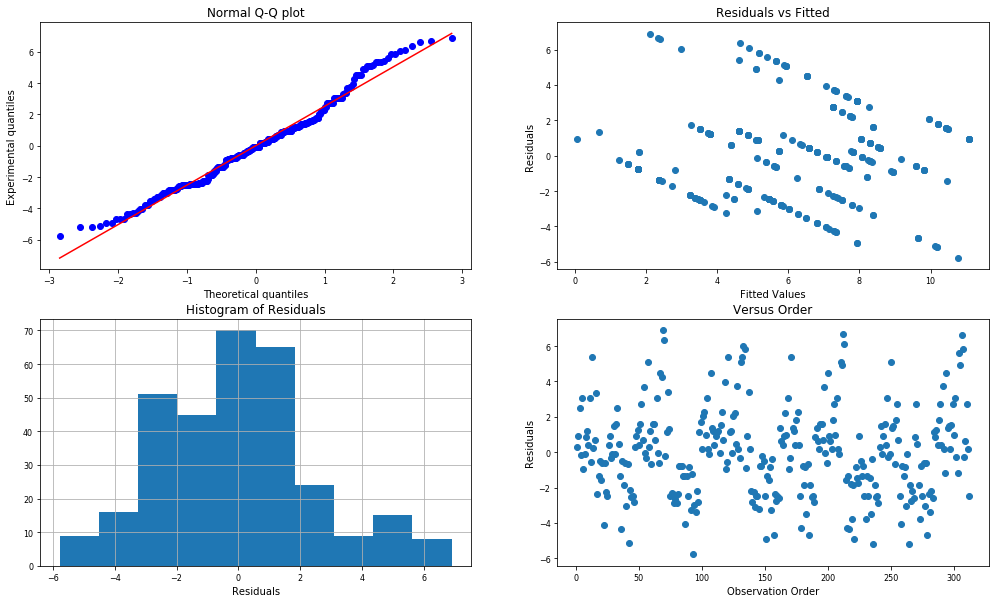

In [16]:
resid=model.resid
f=plt.figure(figsize=(17,10))
# QQNORM
f.add_subplot(2,2,1)
res = stats.probplot(resid, plot=plt)
plt.title("Normal Q-Q plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Experimental quantiles")
plt.tick_params(labelsize=8)

f.add_subplot(2,2,2)
import matplotlib
model

plt.scatter(model.predict(),resid)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tick_params(labelsize=8)


f.add_subplot(2,2,3)
histogram=resid.hist()
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.tick_params(labelsize=8)

f.add_subplot(2,2,4)
a=np.arange(1,len(resid)+1,1)
plt.scatter(a,model.resid)
plt.title("Versus Order")
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.tick_params(labelsize=8)

In [15]:
y=data['Amount Burger']
X=data.drop(['Amount Burger','Timestamp','Code Burger','Code Drink'],axis=1)
X=pd.get_dummies(X)
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount Burger   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     21.91
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.75e-34
Time:                        21:06:24   Log-Likelihood:                -731.04
No. Observations:                 312   AIC:                             1488.
Df Residuals:                     299   BIC:                             1537.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

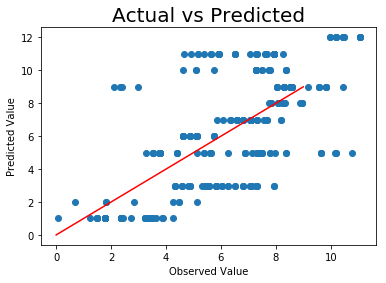

R-Square 0.46786806068038744
R-Square Adj 0.44651159488829595


In [17]:
plt.scatter(model.predict(X),y)
plt.plot(np.arange(0,10),np.arange(0,10),'r')
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted', size=20)
plt.show()
print('R-Square',model.rsquared)
print('R-Square Adj', model.rsquared_adj)

VIF Value
Amount Drink 1.326036240498272
Gender 1.326036240498272


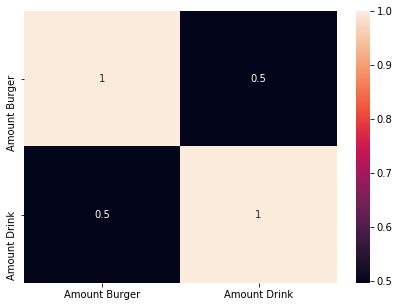

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(data[['Amount Burger','Amount Drink']].corr(),annot=True)

#correlation matrix
import scipy
mc = scipy.corrcoef(data[['Amount Burger','Amount Drink']],rowvar=0)
vif = np.linalg.inv(mc)
print('VIF Value')
print(X.columns[1],vif[0,0])
print(X.columns[2],vif[1,1])

In [66]:
data.head()

,Timestamp,Type_Burger,Code_Burger,Amount_Burger,Type_Drink,Code_Drink,Amount_Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


### Visualisasi 

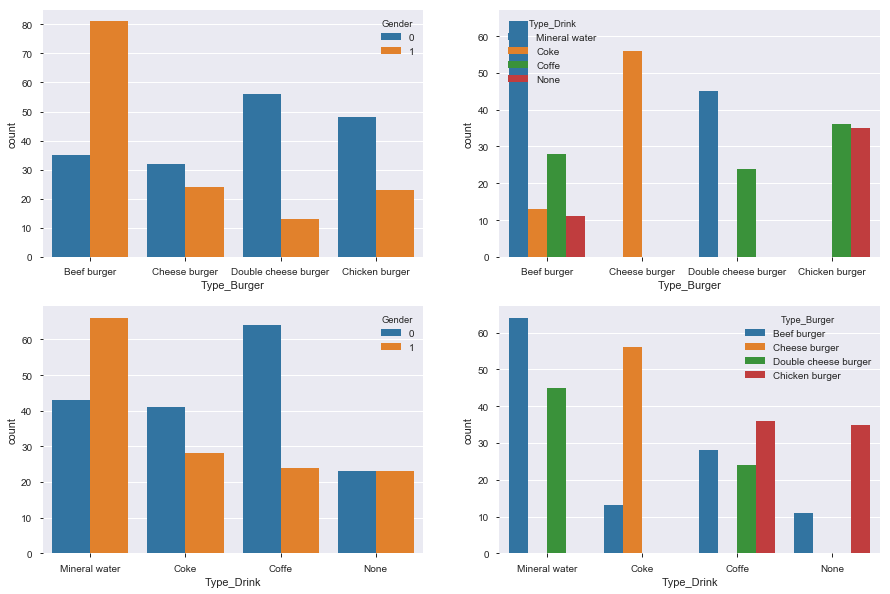

In [125]:
f=plt.figure(figsize=(15,10))
f.add_subplot(2,2,1)
sns.countplot(x=data['Type_Burger'], hue=data['Gender'])
f.add_subplot(2,2,2)
sns.countplot(x=data['Type_Burger'], hue=data['Type_Drink'])
f.add_subplot(2,2,3)
sns.countplot(x=data['Type_Drink'], hue=data['Gender'])
f.add_subplot(2,2,4)
sns.countplot(x=data['Type_Drink'], hue=data['Type_Burger'])



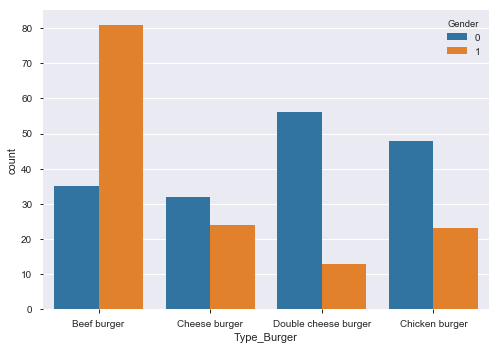

In [134]:
sns.countplot(x=data['Type_Burger'], hue=data['Gender'])

In [25]:
data['Jam']=data['Timestamp'].replace(r':\d\d','',regex=True)
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Menit,Jam
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,01,10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,04,10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,05,10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,06,10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,07,10


In [26]:
data['Menit']=data['Timestamp'].replace(r'\d\d:','',regex=True)
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Menit,Jam
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,01,10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,04,10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,05,10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,06,10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,07,10


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
Menit            312 non-null object
Jam              312 non-null object
dtypes: int64(5), object(6)
memory usage: 26.9+ KB


In [28]:
data['Jam']=data['Jam'].astype('int')

In [29]:
data['Menit']=data['Menit'].astype('int')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
Menit            312 non-null int32
Jam              312 non-null int32
dtypes: int32(2), int64(5), object(4)
memory usage: 24.5+ KB


In [31]:
#data.head(20)

In [53]:
time=[]
a=[]

for i in range(10,22,1):
    a.append(len(data[(data['Jam']==i) & data['Menit'] ]))
    time.append(i)
new=pd.DataFrame()
new['time']=time
new['count']=a
new

,time,count
0,10,16
1,11,19
2,12,6
3,13,11
4,14,10
5,15,12
6,16,10
7,17,10
8,18,20
9,19,13


In [54]:
new.index=new['time']
new=new.drop('time',axis=1)
new.tail()

,count
time,
17,10
18,20
19,13
20,10
21,11


Text(0.5,1,'Banyaknya Pengunjung per Jam')

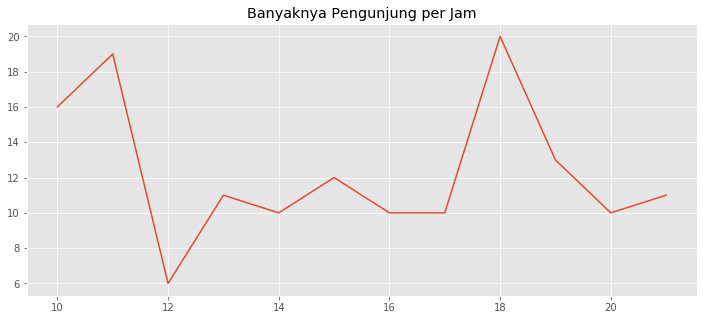

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.plot(new)
plt.title('Banyaknya Pengunjung per Jam')

In [62]:
# Using graph_objects
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=new.index, y=new['count'])])
fig.update_layout(title_text='Banyaknya Pengunjung per Jam',
                  xaxis_rangeslider_visible=False)
fig.show()

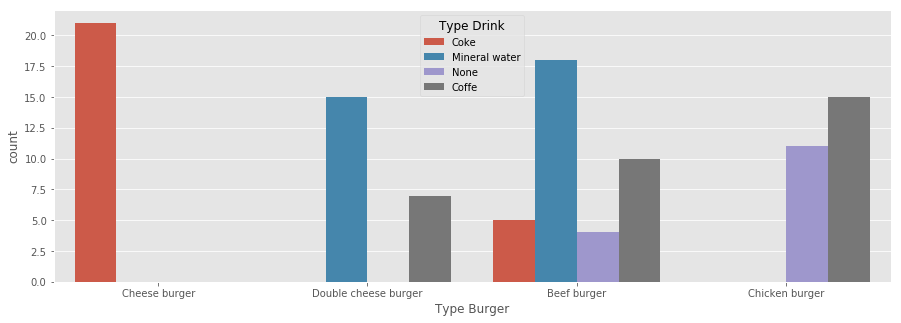

In [131]:
plt.figure(figsize=(15,5))
sns.countplot(x=data[data['Jam']>=18]['Type Burger'], hue=data[data['Jam']>=18]['Type Drink'])

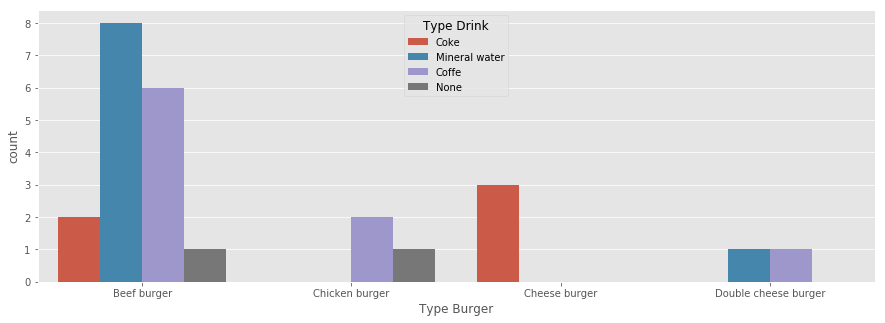

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(x=data[data['Jam']==12]['Type Burger'], hue=data[data['Jam']==12]['Type Drink'])

In [88]:
y=data['Amount Burger']
X=data.drop(['Amount Burger','Timestamp','Code Burger','Code Drink','Menit','Amount Drink'],axis=1)
X=pd.get_dummies(X)

In [125]:
# Modelling Algorithms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
## collect all model in one list
all_model = [DecisionTreeRegressor,
            LinearRegression,
             Ridge,
             Lasso,
             KNeighborsRegressor,
            #LinearSVR,
            SVR,
            RandomForestRegressor,
            AdaBoostRegressor,
            BaggingRegressor,
            GradientBoostingRegressor,
            RandomForestRegressor,
#            ExtraTreesRegressor,
            XGBRegressor]
#all_model

In [126]:
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Menit,Jam
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,1,10
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,4,10
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,5,10
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,6,10
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,7,10


In [127]:
## loop for all model
datatr = []
datasc = []
RMSE=[]
CV=[]
for i in all_model:
    model = i()
    model.fit(X,y)
    datatr.append(model.score( X , y ))
    datasc.append(model.score( X , y ))
    rmse=mean_squared_error(y, model.predict(X))
    RMSE.append(rmse)
    CV.append(rmse/np.mean(y))
    #print(i, model.score( X_train , y_train ) , model.score( X_test , y_test ))

[22:31:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
## compare model each other

data1 = pd.DataFrame()
data1['model'] = all_model
data1['score'] = datatr
#data1['score test'] = datasc
#data1['gap'] = abs(data1['score training'] - data1['score test'])
data1['RMSE']=RMSE
data1['Coef_Variance']=CV
data1.sort_values(by='RMSE',ascending=True)

,model,score,RMSE,Coef_Variance
0,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,0.916544,0.995726,0.159316
10,<class 'sklearn.ensemble.forest.RandomForestRe...,0.824504,2.093858,0.335017
6,<class 'sklearn.ensemble.forest.RandomForestRe...,0.818932,2.160333,0.345653
8,<class 'sklearn.ensemble.bagging.BaggingRegres...,0.814810,2.209514,0.353522
9,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.679724,3.821237,0.611398
11,<class 'xgboost.sklearn.XGBRegressor'>,0.661598,4.037509,0.646002
4,<class 'sklearn.neighbors.regression.KNeighbor...,0.440548,6.674872,1.067979
7,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.363421,7.595085,1.215214
1,<class 'sklearn.linear_model.base.LinearRegres...,0.332105,7.968710,1.274994
2,<class 'sklearn.linear_model.ridge.Ridge'>,0.331958,7.970470,1.275275


In [93]:
model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

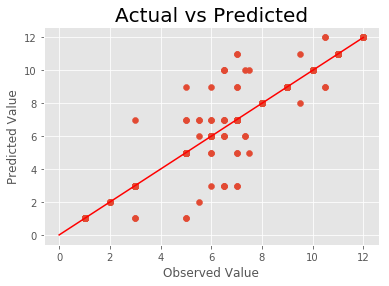

R-Square 91.65435415267518


In [100]:
plt.scatter(model.predict(X),y)
plt.plot(np.arange(0,13),np.arange(0,13),'r')
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted', size=20)
plt.show()
print('R-Square',model.score(X,y)*100)


In [124]:
pd.DataFrame([model.predict(X[:(8)]),y[:8]]).transpose()

,0,1
0,6.0,6.0
1,12.0,12.0
2,10.0,10.0
3,9.0,9.0
4,11.0,11.0
5,8.0,8.0
6,5.0,7.0
7,6.0,6.0


In [132]:
y=data['Amount Drink']
X=data.drop(['Amount Burger','Timestamp','Code Burger','Code Drink','Menit','Amount Drink'],axis=1)
X=pd.get_dummies(X)

## loop for all model
datatr = []
datasc = []
RMSE=[]
CV=[]
for i in all_model:
    model = i()
    model.fit(X,y)
    datatr.append(model.score( X , y ))
    datasc.append(model.score( X , y ))
    rmse=mean_squared_error(y, model.predict(X))
    RMSE.append(rmse)
    CV.append(rmse/np.mean(y))
    #print(i, model.score( X_train , y_train ) , model.score( X_test , y_test ))

## compare model each other

data2 = pd.DataFrame()
data2['model'] = all_model
data2['score'] = datatr
#data1['score test'] = datasc
#data1['gap'] = abs(data1['score training'] - data1['score test'])
data2['RMSE']=RMSE
data2['Coef_Variance']=CV
data2.sort_values(by='RMSE',ascending=True)

[22:37:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,score,RMSE,Coef_Variance
0,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,0.944468,0.485310,0.124010
6,<class 'sklearn.ensemble.forest.RandomForestRe...,0.889270,0.967701,0.247275
8,<class 'sklearn.ensemble.bagging.BaggingRegres...,0.876268,1.081336,0.276312
10,<class 'sklearn.ensemble.forest.RandomForestRe...,0.871647,1.121712,0.286629
9,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.747687,2.205042,0.563451
11,<class 'xgboost.sklearn.XGBRegressor'>,0.739940,2.272748,0.580751
7,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.531171,4.097240,1.046961
1,<class 'sklearn.linear_model.base.LinearRegres...,0.512870,4.257178,1.087829
2,<class 'sklearn.linear_model.ridge.Ridge'>,0.512111,4.263812,1.089524
4,<class 'sklearn.neighbors.regression.KNeighbor...,0.494738,4.415641,1.128321


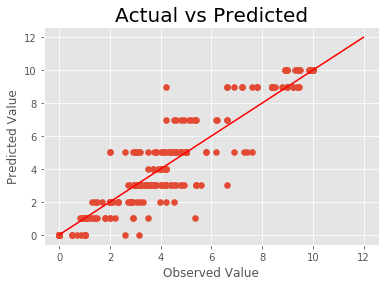

R-Square 87.17908726226483


In [136]:
model = RandomForestRegressor()
model.fit(X,y)
plt.scatter(model.predict(X),y)
plt.plot(np.arange(0,13),np.arange(0,13),'r')
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted', size=20)
plt.show()
print('R-Square',model.score(X,y)*100)

In [137]:
pd.DataFrame([model.predict(X[:(8)]),y[:8]]).transpose()

,0,1
0,3.00,3.0
1,9.00,10.0
2,4.60,5.0
3,8.40,9.0
4,3.00,3.0
5,3.70,4.0
6,5.34,7.0
7,4.00,3.0
